# Using Bias Metrics & Mitigation -- New SDK Functionality

## Authenticate & Imports

In [3]:
import time
import sys
from datetime import datetime, timedelta
import pytz
import joblib

import numpy as np
import pandas as pd
from pathlib import Path

from arthurai import ArthurAI
from arthurai.common.constants import InputType, OutputType, Stage

sys.path.append("..")

In [1]:
connection = ArthurAI(access_key="KEY", url="https://app.arthur.ai")
arthur_model = connection.get_model('<model_id>')

## Get metrics with prewritten queries

In [9]:
arthur_model.bias.metrics.demographic_parity('SEX')

{1: 0.18181818181818182, 2: 0.17391304347826086}

In [10]:
arthur_model.bias.metrics.group_confusion_matrices('SEX')

{'accuracy_rate': {1: 0.9393939393939394, 2: 0.8913043478260869},
 'balanced_accuracy_rate': {1: 0.8981481481481481, 2: 0.8038961038961039},
 'f1': {1: 0.8333333333333334, 2: 0.7368421052631579},
 'false_negative_rate': {1: 0.16666666666666666, 2: 0.36363636363636365},
 'false_positive_rate': {1: 0.037037037037037035, 2: 0.02857142857142857},
 'precision': {1: 0.8333333333333334, 2: 0.875},
 'true_negative_rate': {1: 0.9629629629629629, 2: 0.9714285714285714},
 'true_positive_rate': {1: 0.8333333333333334, 2: 0.6363636363636364}}

## Enable bias mitigation and interact with curves

Enabling bias mitigation, as in the cell below, will kick off the computations on Arthur's end. You may need to wait a few minutes for those computations to complete before continuing.

In [12]:
arthur_model.enable_bias_mitigation()

'ok'

The `mitigator` is an object with its own methods, and can be accessed through the `model.bias` module:

In [16]:
mitigator = arthur_model.bias.mitigation_threshold

For the threshold mitigation method, the key object is the `Curves` object, which stores information about constraints, attribute, the accuracy-maximizing index, and the actual thresholds corresponding to each point on the curve:

In [21]:
curves = mitigator.get_curves('SEX', 'equal_opportunity')
curves

Curves(attribute_name='SEX', constraint='equal_opportunity', max_acc_idx=623, attr_val_to_threshold={'1':           x         y  threshold
0     0.000  0.761009   2.000000
1     0.001  0.761009   2.000000
2     0.002  0.761250   0.991966
3     0.003  0.761250   0.991966
4     0.004  0.761250   0.991966
...     ...       ...        ...
996   0.996  0.455664   0.080198
997   0.997  0.455664   0.080198
998   0.998  0.455664   0.080198
999   0.999  0.299192   0.048562
1000  1.000  0.290385   0.045956

[1001 rows x 3 columns], '2':           x         y  threshold
0     0.000  0.793565   2.000000
1     0.001  0.793643   0.992749
2     0.002  0.793879   0.990571
3     0.003  0.793879   0.990571
4     0.004  0.793879   0.990571
...     ...       ...        ...
996   0.996  0.307293   0.054559
997   0.997  0.307293   0.054559
998   0.998  0.307293   0.054559
999   0.999  0.260640   0.044747
1000  1.000  0.240422   0.039075

[1001 rows x 3 columns]})

We can plot the curves to understand them better, and see where we maximize accuracy:

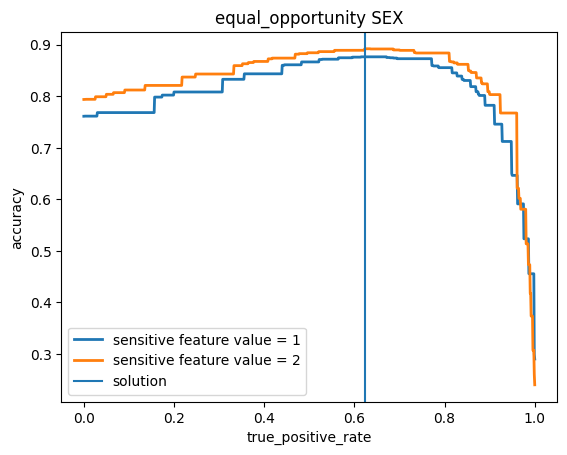

In [19]:
mitigator.plot_curves(curves)

Finally, we can get the thresholds corresponding to a specific point on the curve:

In [20]:
mitigator.get_thresholds_for_idx(curves, 300)

{'1': 0.802462225348353, '2': 0.765284400210087}